![Stationery](Stationery.jpg)


## Overview of the Data

To gain an initial understanding of the dataset, I imported the data using the pd.read_csv() function and examined the first 20 rows with the display() function. This provided an early glimpse into the structure, variables, and sample values, setting the foundation for subsequent analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv("product_sales.csv", nrows=20)
display(sales)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


**The descriptions for the columns are as follows:**


| Column Name       | Description                                                   |
|-------------------|---------------------------------------------------------------|
| week              | Week sale was made, counted as weeks since product launch     |
| sales_method      | Character, which of the three sales methods were used for that customer |
| customer_id       | Character, unique identifier for the customer                 |
| nb_sold           | Numeric, number of new products sold                          |
| revenue           | Numeric, revenue from the sales, rounded to 2 decimal places |
| years_as_customer | Numeric, number of years customer has been buying from us (company founded in 1984) |
| nb_site_visits    | Numeric, number of times the customer has visited our website in the last 6 months |
| state             | Character, location of the customer i.e. where orders are shipped |



## Data Validation & Cleaning Steps

Before performing in-depth analysis, it was essential to validate and clean the dataset to ensure accuracy and reliability of results. This process involved checking for inconsistencies, missing values, and proper formatting across key variables. Any anomalies detected were addressed appropriately to maintain data integrity throughout the analysis.

**Checking Data Types and Dataset Dimensions**

Using the pandas info() method, I verified that all columns are of the appropriate data types for their respective variables. This ensured consistency and suitability for analysis. Additionally, I confirmed that the dataset contains 15,000 rows and 8 columns, providing a substantial amount of data for robust insights.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv("product_sales.csv")
print(sales.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


**Checking for Null Values**

Using the pandas info() method, I identified that the revenue column was the only variable containing missing values, with a total of 1,074 null entries. To better understand the distribution and the presence of outliers within this column, I employed a boxplot visualization which revealed noticeable outliers. Given this distribution, median imputation was determined to be the most appropriate method to handle the missing values, with the median calculated based on the descriptive statistics obtained from the describe() method.

count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64


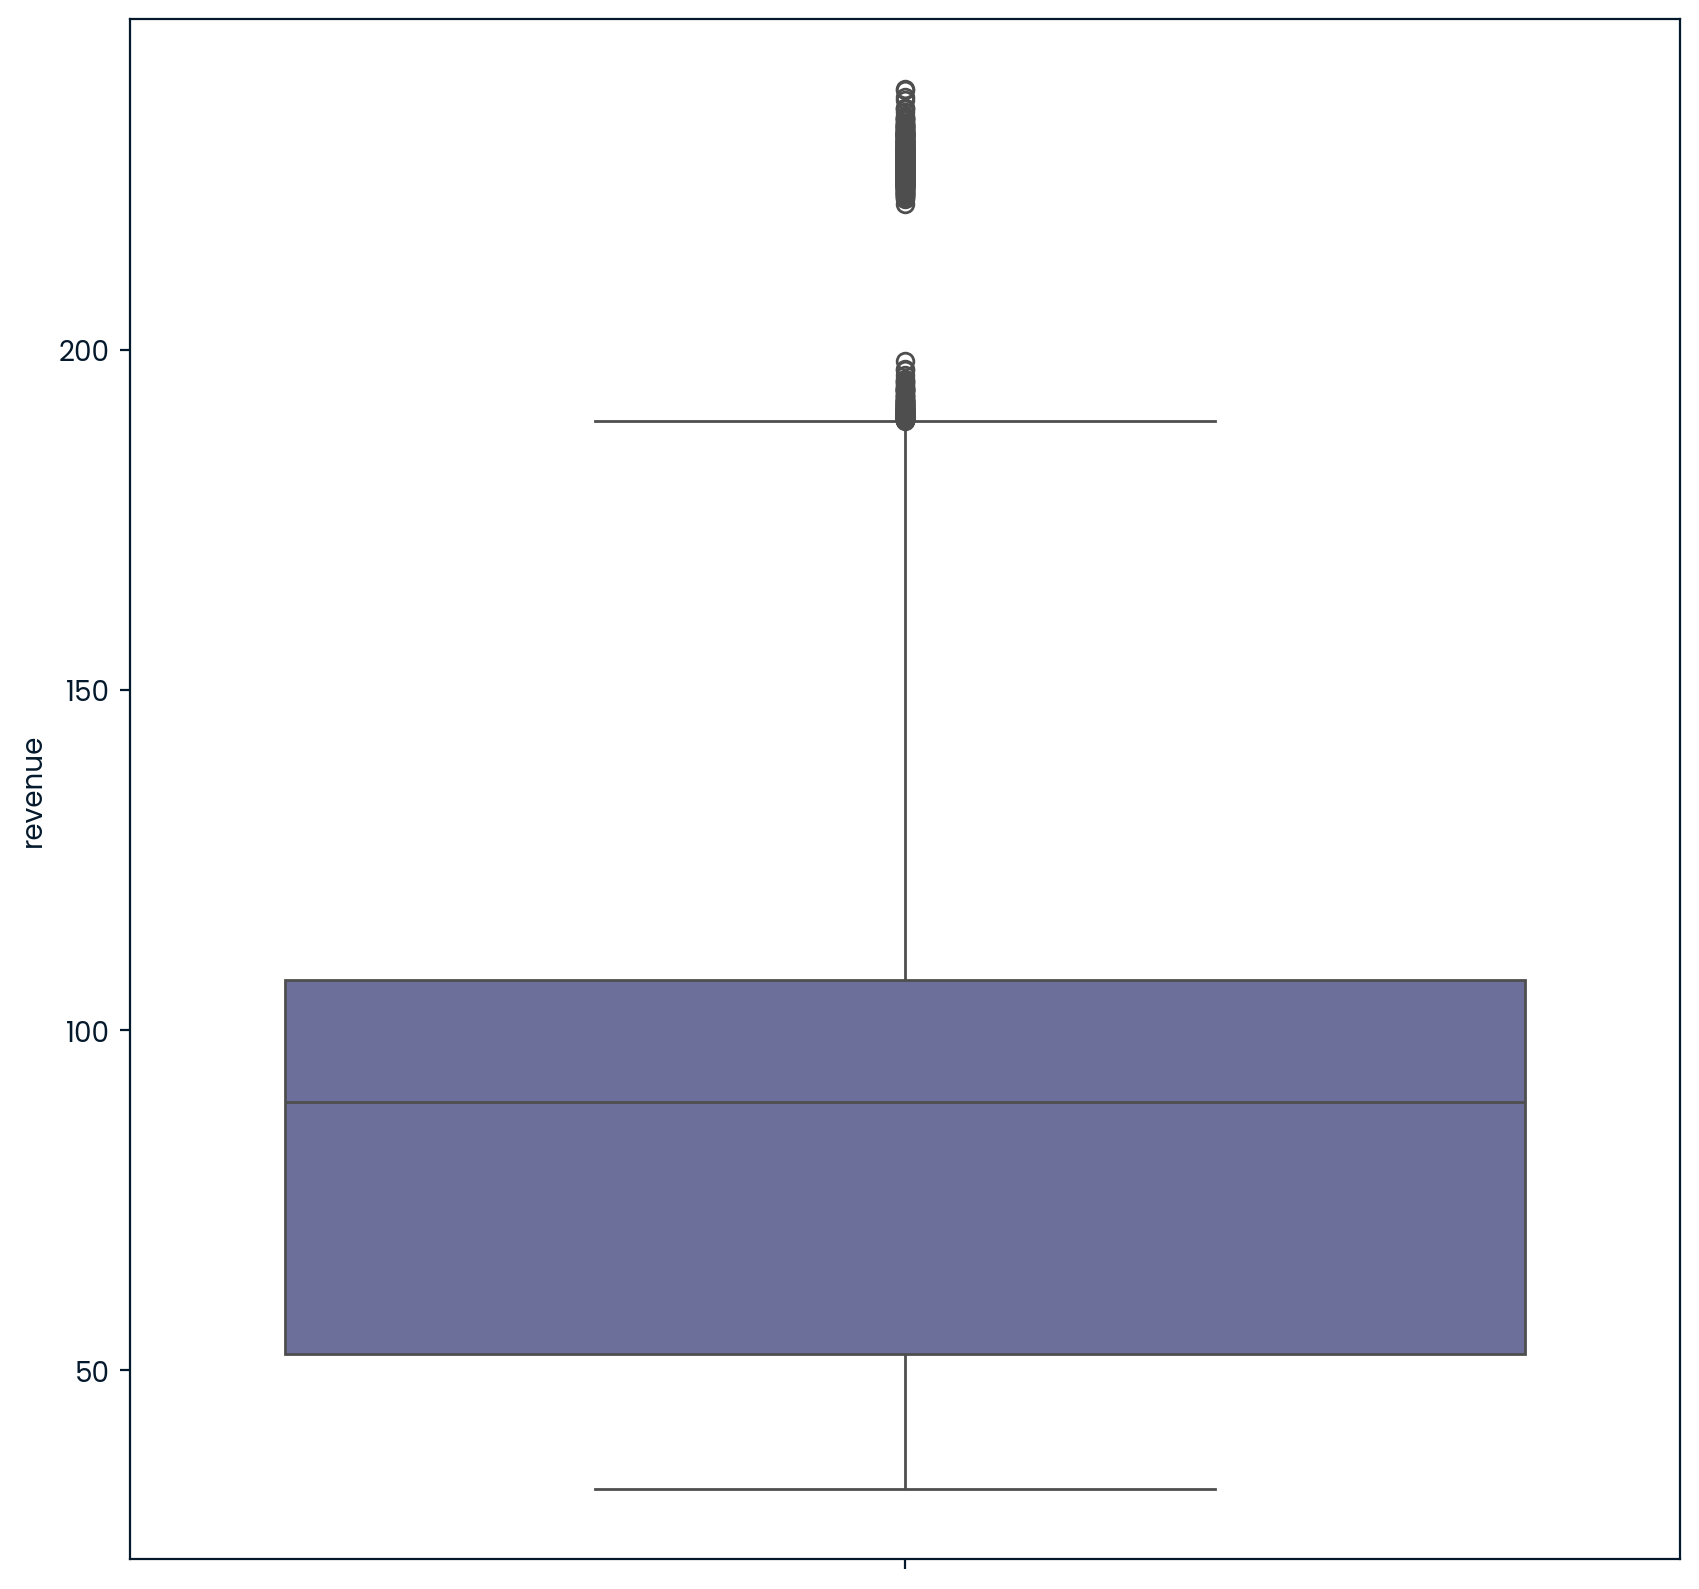

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv("product_sales.csv")
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(sales.revenue)
print(sales.revenue.describe())

**Checking Data Format in the Sales Method Column**

Upon applying the unique() method to the sales_method column, I discovered the presence of four distinct sales method values instead of the expected three, as noted in the comments. To address this inconsistency, I utilized a for loop combined with the str.replace() method to standardize the sales method labels. Following these corrections, the pandas info() method was employed to verify that there are no null values and to confirm that naming consistency across the column has been successfully restored.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv("product_sales.csv")
#Use df.copy() to create an explicit duplication of the original dataframe
new_sales = sales.copy()
#Impute the missing vales in revenue column with the median value which is 89.50
new_sales['revenue'] = new_sales['revenue'].fillna(89.50)

# Below you can see the values in the sales method column. They should be 3 but we have 5 of them.
# print(sales['sales_method'].unique())
#['Email' 'Email + Call' 'Call' 'em + call' 'email']

# Use a dictionary to map old strings to new ones
replacements = {
    'em + call': 'Email + Call',
    'email': 'Email'
}

# Loop through the dictionary and apply a simple, non-regex replace
for old_string, new_string in replacements.items():
    new_sales['sales_method'] = new_sales['sales_method'].str.replace(old_string, new_string, regex=False)

print(new_sales['sales_method'].unique())
print(new_sales.info())


['Email' 'Email + Call' 'Call']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


**Data Precision Validation in Revenue Column**

A validation was performed to confirm that all values in the revenue column are formatted with exactly two decimal places. Any deviations from this standard were identified and subsequently corrected by rounding the values to two decimal places. This step ensured consistency and accuracy in the revenue data for reliable analysis.

In [5]:
def not_two_decimals(x):
        decimals = str(x).split('.')[-1]
        return not (isinstance(x, float) and len(decimals) == 2)
    

# Check if all values in revenue column have two decimals
all_two_decimals = new_sales['revenue'].apply(lambda x: not not_two_decimals(x)).all()

# If any value does not conform, round the whole column
if not all_two_decimals:
    new_sales['revenue'] = new_sales['revenue'].round(2)
    print("Revenue column rounded to 2 decimal places.")
else:
    print("All revenue values already have 2 decimal places.")




Revenue column rounded to 2 decimal places.


**Range Check for the years as customer column**

The years_as_customer column was checked to ensure its values fell within a valid range. Since the company was founded in 1984, the maximum possible value for a customer in 2025 is 41 years.

A range check identified two outliers, 47 and 63. These values were replaced with the correct maximum value of 41 to ensure data accuracy for the summary report.

In [6]:
# Use a boolean mask to find all values in the 'years' column that are greater than 41.
years_beyond_range = new_sales['years_as_customer'] > 41

#Get the exact values that will be replaced
values_to_replace = new_sales.loc[years_beyond_range, 'years_as_customer'].tolist()

print(values_to_replace)

# Replace the outliers 47 and 63 with 41
new_sales['years_as_customer'] = new_sales['years_as_customer'].replace([63, 47], 41)
#Print to confirm the max value of the column is 41.
print(new_sales['years_as_customer'].max())


[63, 47]
41


Any additional data transformations and feature engineering necessary to enhance the analysis were carried out in the subsequent Analysis section, following the completion of initial validation and cleaning steps.

## The Analysis

### Number of Customers by Sales Method

An analysis of the sales methods reveals a clear preference among customers. The **email** sales method is the most popular, accounting for 7,466 customers. The **call** method follows with 4,962 customers, while the **email plus call** method is the least utilized, with 2,572 customers. This distribution highlights email as the dominant sales channel.

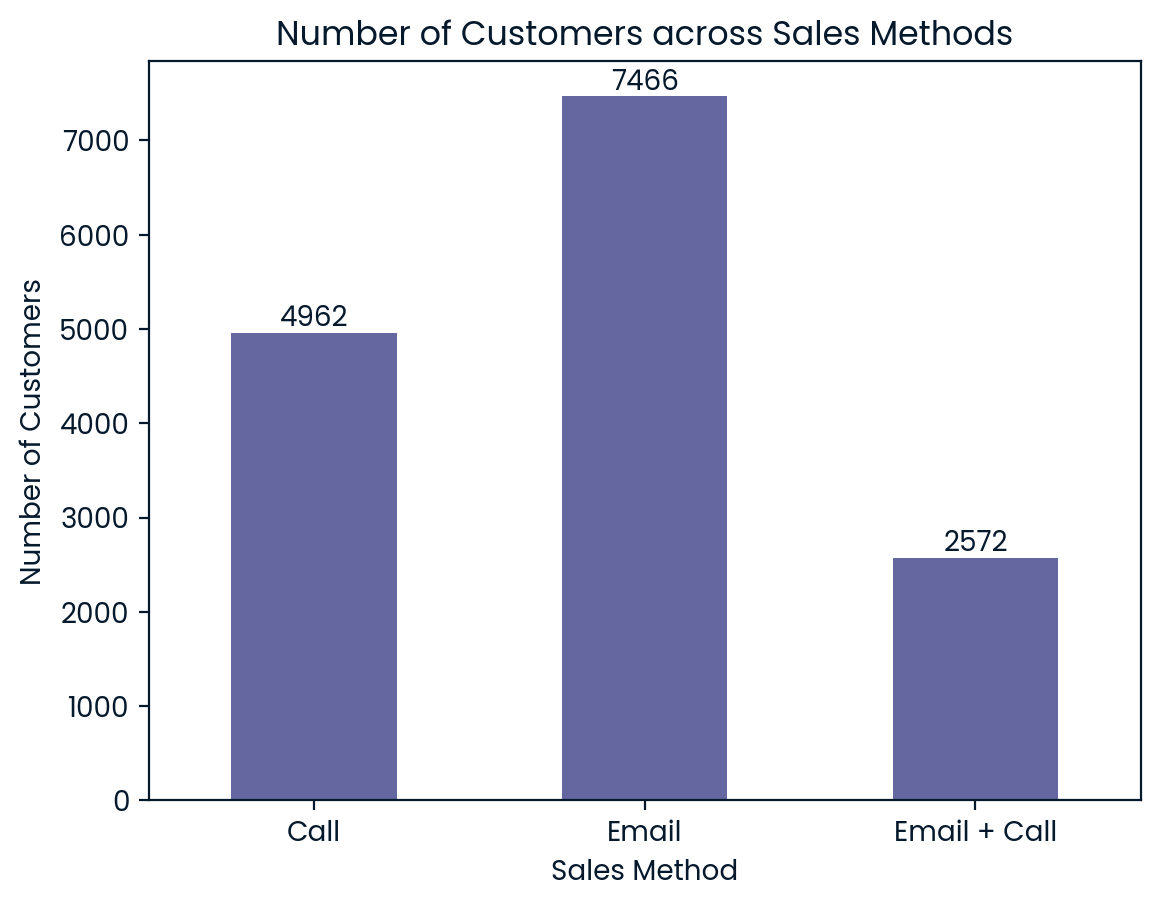

In [7]:
# Group by 'sales_method' and count the number of unique 'customer id's in each group
cust_per_method = new_sales.groupby('sales_method')['customer_id'].nunique()
#print(cust_per_method)
# Create a bar plot from the grouped DataFrame
ax = cust_per_method.plot(kind='bar', rot=0)

# Get the container of the bars
container = ax.containers[0]

# Add labels to the bars
ax.bar_label(container, fmt='%.0f')

# Add titles and labels for clarity
plt.title('Number of Customers across Sales Methods')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')

# Display the plot
plt.show()

### Revenue Distribution

The revenue generated from product sales spans a range of 32.54 to 238.52. The distribution is right-skewed, as indicated by the mean of 93.62 being greater than the median of 89.50. This suggests that while most sales fall near the median value, a smaller number of high-value sales pull the average higher.

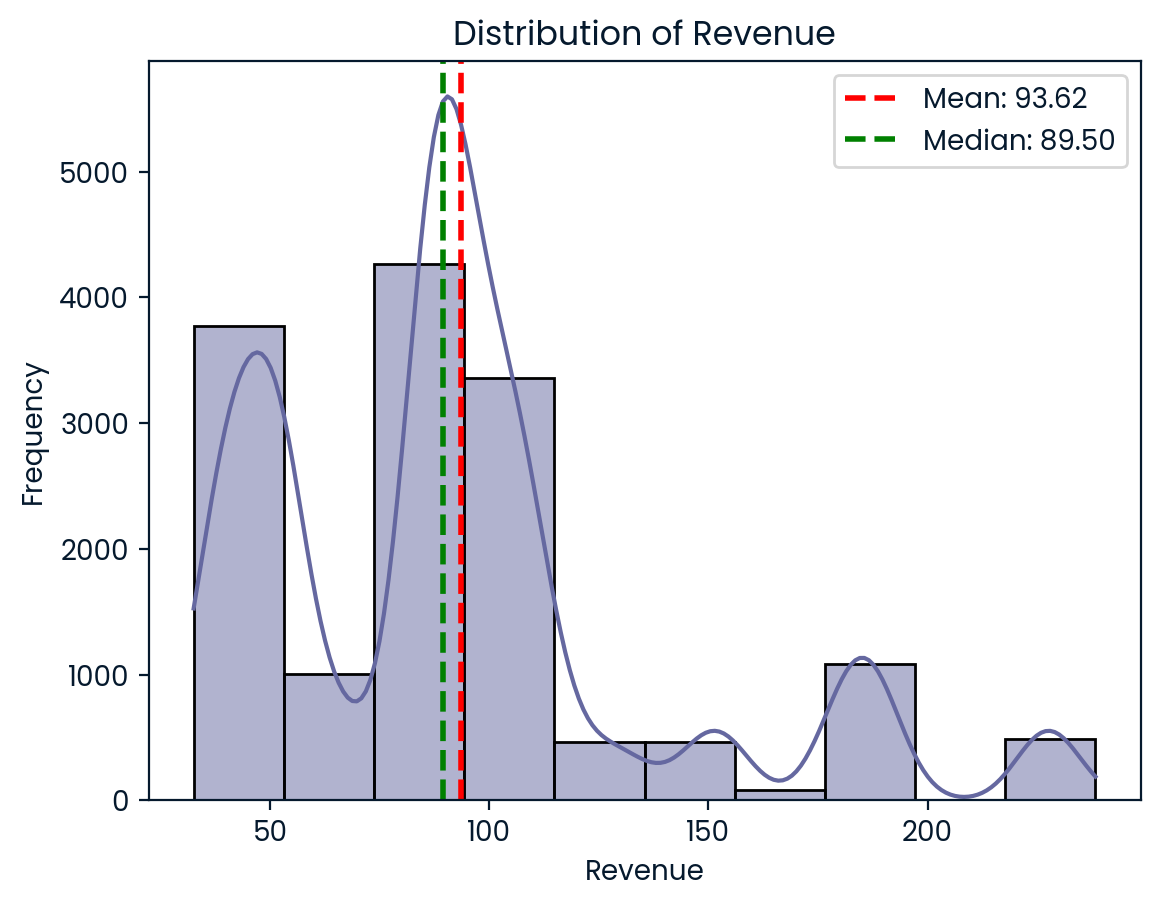

In [8]:
import numpy as np

# Create the histplot
sns.histplot(data=new_sales, x='revenue', bins=10, kde=True)

mean_val = np.mean(new_sales['revenue'])
median_val = np.median(new_sales['revenue'])

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Add titles and labels
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
# Display the plot
plt.show()

### Revenue Spread Across Sales Methods

The revenue generated varies significantly by sales method. The Email + Call method has the highest average revenue, with a mean of 170.88 and a median of 182.14. This method also shows the widest range and highest standard deviation 42.08, indicating a greater spread in revenue values. 

In contrast, the Call method generates the lowest average revenue, with a mean of 49.13 and a median of 49.94. The Email method falls in the middle, with an average revenue of 96.57. This analysis highlights that combining sales methods, particularly Email + Call, is associated with significantly higher revenue per transaction.

In [9]:
rev_per_method = new_sales.groupby('sales_method')['revenue'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

display(rev_per_method)

,mean,median,std,min,max,count
sales_method,,,,,,
Call,49.125955,49.935,11.539040,32.54,89.50,4962
Email,96.571903,94.275,10.974845,78.83,148.97,7466
Email + Call,170.875657,182.135,42.084163,89.50,238.32,2572


### Revenue Trend Across Sales Methods

An analysis of weekly revenue trends reveals distinct patterns for each sales method over the six-week period.

* The Call method demonstrated a general upward trend in total revenue, rising steadily from 27,770.18 in week 1 to a peak of 56,829.21 in week 5 before declining in week 6.

* In contrast, the Email method showed a consistent and significant decline in total revenue. Starting at a high of 246,681.05 in week 1, revenue steadily dropped to just 25,138.35 by week 6.

* The Email + Call method exhibited a strong and consistent growth trend. Total revenue for this method grew substantially each week, starting at 18,406.63 and reaching a peak of 136,744.20 in week 5, before a slight drop to 119,654.57 in week 6.

These trends indicate that while the Email + Call method is showing consistent growth, the Email method's effectiveness appears to be diminishing over time.

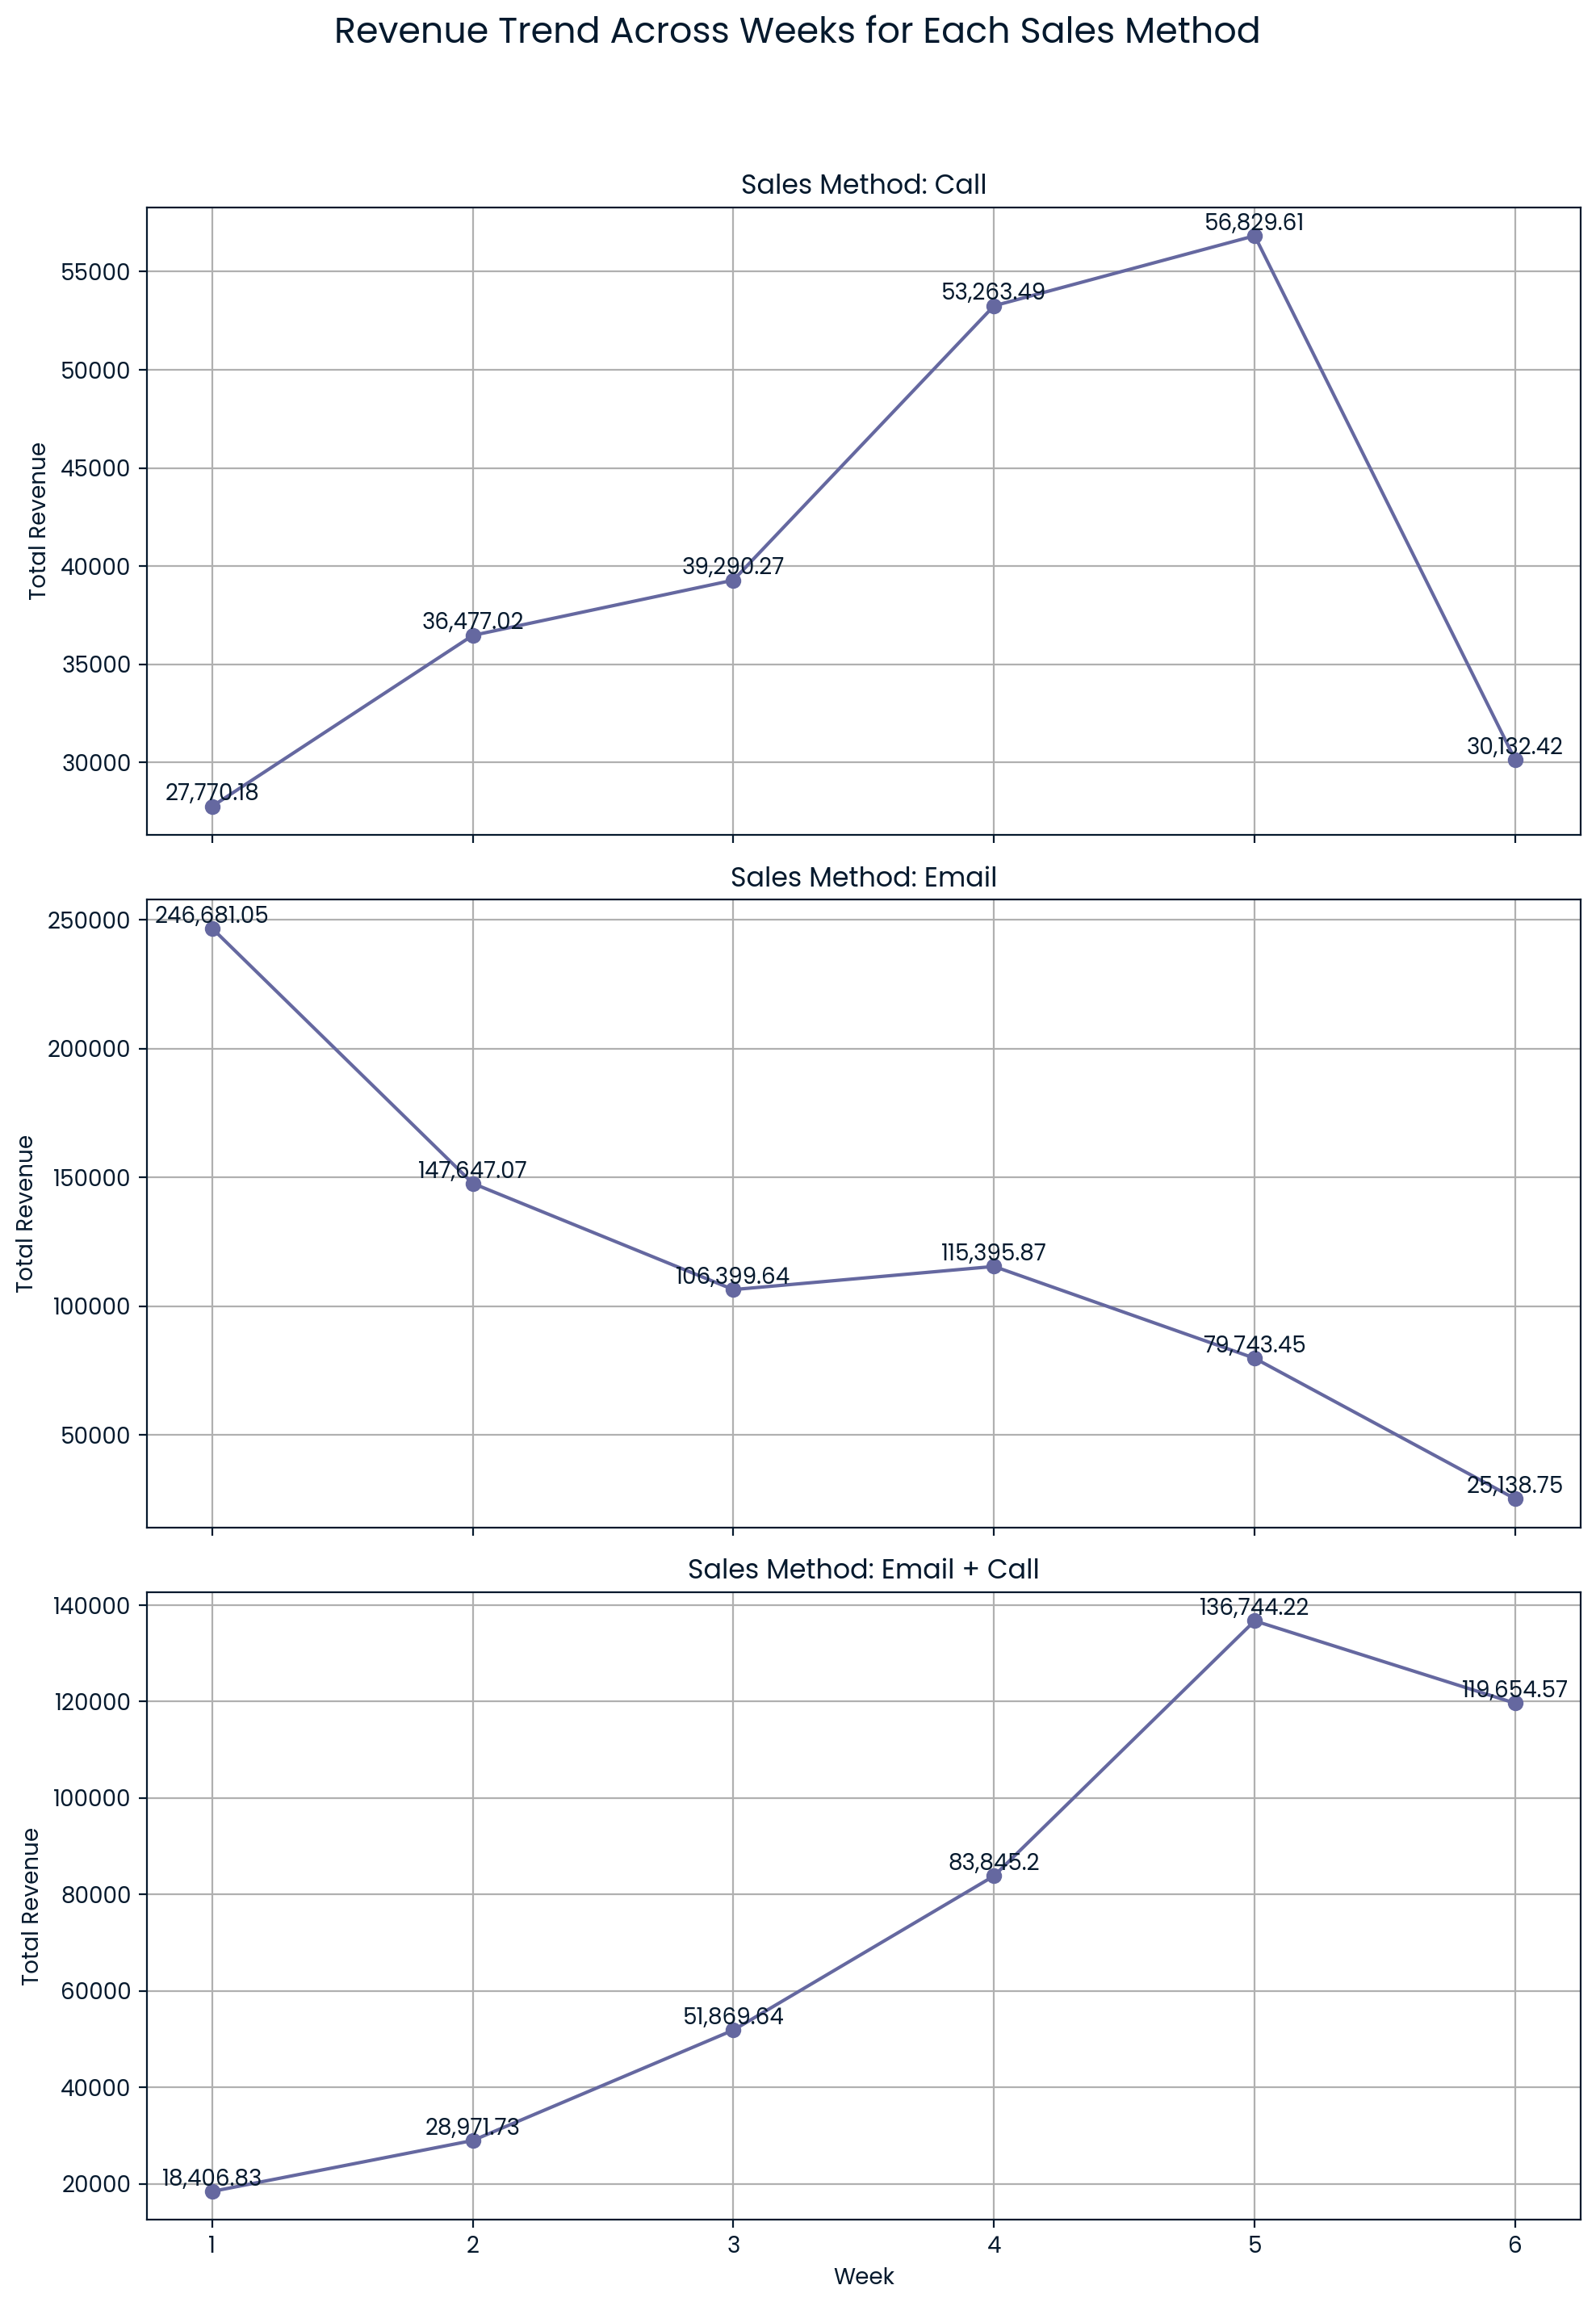

In [10]:
# Group by method and week, then calculate the sum of revenue for each group
df_plot = new_sales.groupby(['sales_method', 'week'])['revenue'].sum().reset_index()

# Get the unique sales methods for subplots
sales_methods = df_plot['sales_method'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(sales_methods), ncols=1, figsize=(10, 15), sharex=True)
fig.suptitle('Revenue Trend Across Weeks for Each Sales Method', fontsize=16)

# Create a line plot for each sales method
for i, method in enumerate(sales_methods):
    ax = axes[i]
    method_data = df_plot[df_plot['sales_method'] == method]
    ax.plot(method_data['week'], method_data['revenue'], marker='o', linestyle='-')
    ax.set_title(f'Sales Method: {method}')
    ax.set_ylabel('Total Revenue')
    ax.grid(True)
    ax.set_xticks(range(1, 7))
    # Add text labels to each point on the plot
    for x, y in zip(method_data['week'], method_data['revenue']):
        ax.text(x, y + 20, f'{y:,}', ha='center', va='bottom')

# Set the common x-axis label
axes[-1].set_xlabel('Week')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Customer Demographics

### Customer Loyalty Analysis

An analysis of customer loyalty, segmented by years as a customer, reveals that the customer base is heavily weighted toward newer customers. The largest segment is the 0-1 Year group with 3,975 customers, followed by the 2-3 Years segment with 3,606 customers.

The number of customers decreases significantly as loyalty increases, with only 45 customers in the 31-45 Years segment. This distribution indicates a strong influx of new customers but also suggests a need to focus on retention strategies for longer-term customer segments.

In [11]:

years_col = new_sales['years_as_customer']

# Define the bin edges and labels
# The number of bin labels should be 1 less than the number of bin edges
bin_edges = [-1, 1, 3, 5, 10, 15, 20, 30, 45]
bin_labels = [
    '0-1 Year', '2-3 Years', '4-5 Years', '6-10 Years',
    '11-15 Years', '16-20 Years', '21-30 Years', '31-45 Years',
]

# Create a new column 'loyalty_segment' by binning the 'years' column
new_sales['loyalty_segment'] = pd.cut(
    years_col,
    bins=bin_edges,
    labels=bin_labels
)

# You can then check the distribution of customers in each new bin
display(new_sales['loyalty_segment'].value_counts().sort_index())

0-1 Year       3975
2-3 Years      3606
4-5 Years      2456
6-10 Years     3149
11-15 Years    1158
16-20 Years     405
21-30 Years     206
31-45 Years      45
Name: loyalty_segment, dtype: int64

### Customer Loyalty vs. Sales Performance, Revenue, and Behavior

Analysis of the data reveals a negative correlation between customer loyalty and key performance metrics. As customer tenure increases, there is a consistent decline in average revenue per customer, number of items sold, and website visits.

* **Revenue**: The 0-1 Year segment has the highest average revenue at 97.27  This value steadily decreases to 80.33 for the most loyal customers in the 31-45 Years segment.
* **Sales Performance**: The number of new products sold follows a similar trend, dropping from 10.33 items for new customers to 9.27 items for the most loyal group.
* **Behavior**: Average website visits also show a slight but consistent decrease with loyalty, moving from 25.22 visits for new customers to 24.64 for the longest-standing customers.

This pattern suggests that while new customers are highly engaged and generate higher sales, the performance of longer-term customers tends to wane over time.

In [12]:

# Group by loyalty_bin and calculate average site visits, revenue, and products sold
loyalty_summary = new_sales.groupby('loyalty_segment').agg({
    'nb_site_visits': 'mean',
    'revenue': 'mean',
    'nb_sold': 'mean'
}).reset_index()

display(loyalty_summary)


,loyalty_segment,nb_site_visits,revenue,nb_sold
0,0-1 Year,25.222138,97.273630,10.328553
1,2-3 Years,25.037992,94.897937,10.140044
2,4-5 Years,24.949919,93.346775,10.077769
3,6-10 Years,24.861543,90.447596,9.898063
4,11-15 Years,24.720207,89.127176,9.832470
5,16-20 Years,24.607407,89.198123,9.637037
6,21-30 Years,24.519417,89.163544,9.820388
7,31-45 Years,24.644444,80.333556,9.266667


### Customer Loyalty vs. Sales Method

The data shows that the Email sales method is the most popular across all customer loyalty segments. 

* Email consistently attracts the highest number of customers, with its peak in the 0-1 Yearsegment (1,935 customers). This dominance is consistent across all loyalty groups, including the most loyal customers in the 31-45 Years segment (28 customers).
* The Call method is the second most used, followed by Email + Call. This trend holds true across all segments, except for the 4-5 Years group, where the Call method is slightly more popular than Email + Call.

Overall, the data suggests that email is the primary channel for customer interaction regardless of their loyalty level.

In [13]:

sales_method_counts = new_sales.groupby(['loyalty_segment', 'sales_method']).size().unstack()

display(sales_method_counts)


sales_method,Call,Email,Email + Call
loyalty_segment,,,
0-1 Year,1256,1935,784
2-3 Years,1164,1813,629
4-5 Years,811,1231,414
6-10 Years,1089,1590,470
11-15 Years,415,562,181
16-20 Years,138,211,56
21-30 Years,75,96,35
31-45 Years,14,28,3


### Customer Loyalty vs. Location

The analysis of customer loyalty across different states reveals a notable geographic concentration of newer customers. The states of California, Texas, Florida, and New York are home to the largest number of customers in the 0-1 Year loyalty segment. This suggests that these states are major hubs for acquiring new customers.

Conversely, the population of the longest-standing customers (those in the 31-45 Years loyalty segment) is minimal across all states. This underscores the broader trend of a customer base heavily skewed toward recent acquisitions, with a relatively small number of long-term, highly loyal patrons.

In [14]:
state_loyalty_counts = new_sales.pivot_table(
    index='state',
    columns='loyalty_segment',
    values='customer_id',
    aggfunc='nunique',
)
display(state_loyalty_counts)


loyalty_segment,0-1 Year,2-3 Years,4-5 Years,6-10 Years,11-15 Years,16-20 Years,21-30 Years,31-45 Years
state,,,,,,,,
Alabama,51,43,44,45,17,9,3,2
Alaska,9,9,5,13,1,2,1,0
Arizona,98,60,54,74,17,13,5,0
Arkansas,32,31,22,34,11,2,0,0
California,505,439,318,388,137,50,28,7
Colorado,59,58,37,47,17,7,3,2
Connecticut,45,45,30,34,17,6,2,0
Delaware,5,13,9,4,3,0,0,0
Florida,267,211,150,171,69,25,8,3


### Customer Distribution by State

The geographic analysis of the customer base reveals a concentration in a few key states. The states with the highest number of customers are:

* **California:** 1,872 customers
* **Texas:** 1,187 customers
* **New York:** 965 customers
* **Florida:** 904 customers
* **Illinois:** 617 customers

This indicates that these states are primary markets for the company, accounting for a significant portion of its customer base.

In [15]:
import plotly.express as px

us_state_to_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'Puerto Rico': 'PR'
}

# Add a new column with state abbreviations
new_sales['State_Code'] = new_sales['state'].map(us_state_to_abbrev)

# Aggregate the data using the state codes
customers_by_state = new_sales.groupby('State_Code').size().reset_index(name='Number of Customers')

# Use the aggregated DataFrame to create the choropleth map
fig = px.choropleth(
    customers_by_state,
    locations='State_Code',
    locationmode='USA-states',
    color='Number of Customers',
    scope='usa',
    title='Number of Customers by State',
    color_continuous_scale=['#B3B3D9', '#3498DB', '#2ECC71']
)

# Display the map
fig.show()

### Sales Performance and Activity by State

* **California** leads in total customer count and likely revenue. Given its large population and economic size, California serves as a crucial market for the organization.
* **Texas, Florida, and New York** are also major contributors to the customer base and revenue. Texas and Florida, in particular, have shown rapid economic growth, making them increasingly important markets.
* **Illinois** is the fifth largest market. While smaller in scale than the other top states, it remains a significant contributor to the customer base.

This concentration of customers in a few states indicates that sales and marketing efforts should be primarily focused on these regions to maximize return on investment. Furthermore, understanding the specific characteristics of these markets (e.g., California's focus on technology, New York's financial sector) can help tailor sales strategies for better performance. 

In [16]:
import numpy as np


state_sales_pivot = pd.pivot_table(
    new_sales,
    values=['revenue', 'nb_sold', 'nb_site_visits'],
    index='state',
    aggfunc='sum'
).reset_index()

state_sales_pivot = state_sales_pivot.sort_values(by='revenue', ascending=False)
display(state_sales_pivot)


,state,nb_site_visits,nb_sold,revenue
4,California,46673,18859,172944.39
42,Texas,29632,11957,113275.45
31,New York,24116,9734,89149.74
8,Florida,22818,9201,84632.75
12,Illinois,15395,6143,56318.85
37,Pennsylvania,14938,5979,55622.85
34,Ohio,14135,5699,52127.94
21,Michigan,12410,4998,47288.81
9,Georgia,12224,4930,46021.91
32,North Carolina,11315,4559,41013.65


### Sales Method Usage in Top 5 States

An analysis of the top five states by customer count (California, Texas, New York, Florida, and Illinois) reveals that **email is the dominant sales method across all of them**. 

* **California** has the highest number of customers using the email method (**921**), followed by **Texas** (**598**). 
* The **Call** method is consistently the second most used, followed by the **Email + Call** method. This trend holds true for all five states.

The data indicates that while these states are major customer hubs, the primary method of engagement remains consistent with the overall company trend, underscoring email's importance as the key sales channel.


In [17]:
# Assume you have your top states in a list
top_states = state_sales_pivot['state'].head(5).tolist()

# Filter original data for top states only
top_states_data = new_sales[new_sales['state'].isin(top_states)]

# Create pivot table: sales count by sales_method and state
sales_method_by_state = pd.pivot_table(
    top_states_data,
    index='state',
    columns='sales_method',
    values='customer_id',  
    aggfunc='nunique',      # counts number of sales per method
    fill_value=0
).reset_index()

display(sales_method_by_state)


sales_method,state,Call,Email,Email + Call
0,California,642,921,309
1,Florida,297,452,155
2,Illinois,210,313,94
3,New York,337,475,153
4,Texas,377,598,212


### Weekly Sales Performance vs. Customer Behavior

An analysis of weekly sales performance and customer behavior reveals a strong correlation between the number of website visits and the number of products sold. As shown in the data provided, both metrics exhibit similar trends over the six-week period.

* **Website Visits**: The number of website visits started high in Week 1 (**86,095**), followed by a decrease in Weeks 2 and 3. There was an increase in visits in Weeks 4 and 5, followed by a significant drop in Week 6 (**34,711**).
* **Products Sold**: The number of products sold directly mirrors the trend in website visits. It peaked in Week 1 (**31,220**), followed by a dip in the following weeks, and then a slight recovery in Weeks 4 and 5, before a sharp decline in Week 6 (**17,248**).

This parallel trend suggests that website visits are a key driver of sales volume. Optimizing website traffic and user experience is therefore crucial for boosting product sales.

In [18]:

week_sales_site_visits_pivot = pd.pivot_table(
    new_sales,
    values=['nb_sold', 'nb_site_visits'],
    index='week',
    aggfunc='sum'
)

display(week_sales_site_visits_pivot)

,nb_site_visits,nb_sold
week,,
1,86095,31220
2,61595,24056
3,57544,21728
4,66900,27955
5,68018,29063
6,34711,17248


### Weekly Customer Acquisition by Sales Method

The number of customers acquired each week shows distinct trends for each sales method.

* The **Call** method consistently increased in customer count from week 1 (**758**) to week 5 (**1,044**), before a sharp decline in week 6.
* The **Email** method, despite starting with the highest customer count in week 1 (**2,815**), experienced a steady and significant decrease throughout the period, ending with only **197** customers in week 6.
* The **Email + Call** method showed the most consistent growth, with a steady increase from week 1 (**148**) to week 6 (**583**).

These trends indicate that while the **Email** method initially captured the most customers, its effectiveness diminished rapidly. In contrast, the combined **Email + Call** method showed consistent and sustained growth in customer acquisition throughout the six-week period.

In [19]:
weekly_cust_per_sales_method = new_sales.pivot_table(
    index='week',
    columns='sales_method',
    values='customer_id',
    aggfunc='nunique',
)
display(weekly_cust_per_sales_method)

sales_method,Call,Email,Email + Call
week,,,
1,758,2815,148
2,805,1486,200
3,902,1150,359
4,1005,1075,495
5,1044,743,787
6,448,197,583


### Correlation Between Numeric Variables
1.  **Sales Performance and Website Visits**: The analysis of weekly sales performance and customer behavior noted a clear, parallel trend between website visits and products sold. The heatmap strongly supports this observation with a **moderate positive correlation (0.49)** between `nb_site_visits` and `nb_sold`, statistically confirming that higher website traffic is directly linked to an increase in sales volume.

2.  **Revenue and Products Sold**: Your analysis on revenue spread across sales methods identified that the **Email + Call** method generated the highest average revenue. This is a direct consequence of selling more items, as validated by the heatmap's **strong positive correlation (0.66)** between **revenue** and **nb_sold**. This relationship demonstrates that increasing the number of products sold is a primary driver of revenue growth.

3.  **Customer Loyalty and Sales Performance**: The finding that customer engagement and sales performance decline with increasing customer tenure is statistically proven by the heatmap. It shows a **weak negative correlation (-0.10)** between `years_as_customer` and `nb_sold`. This confirms the counterintuitive trend that longer-term customers, on average, are less active and generate less revenue than newer customers.

In summary, the correlation analysis provides a data-driven foundation for the behavioral patterns observed, solidifying the report's conclusions about customer behavior and sales drivers.

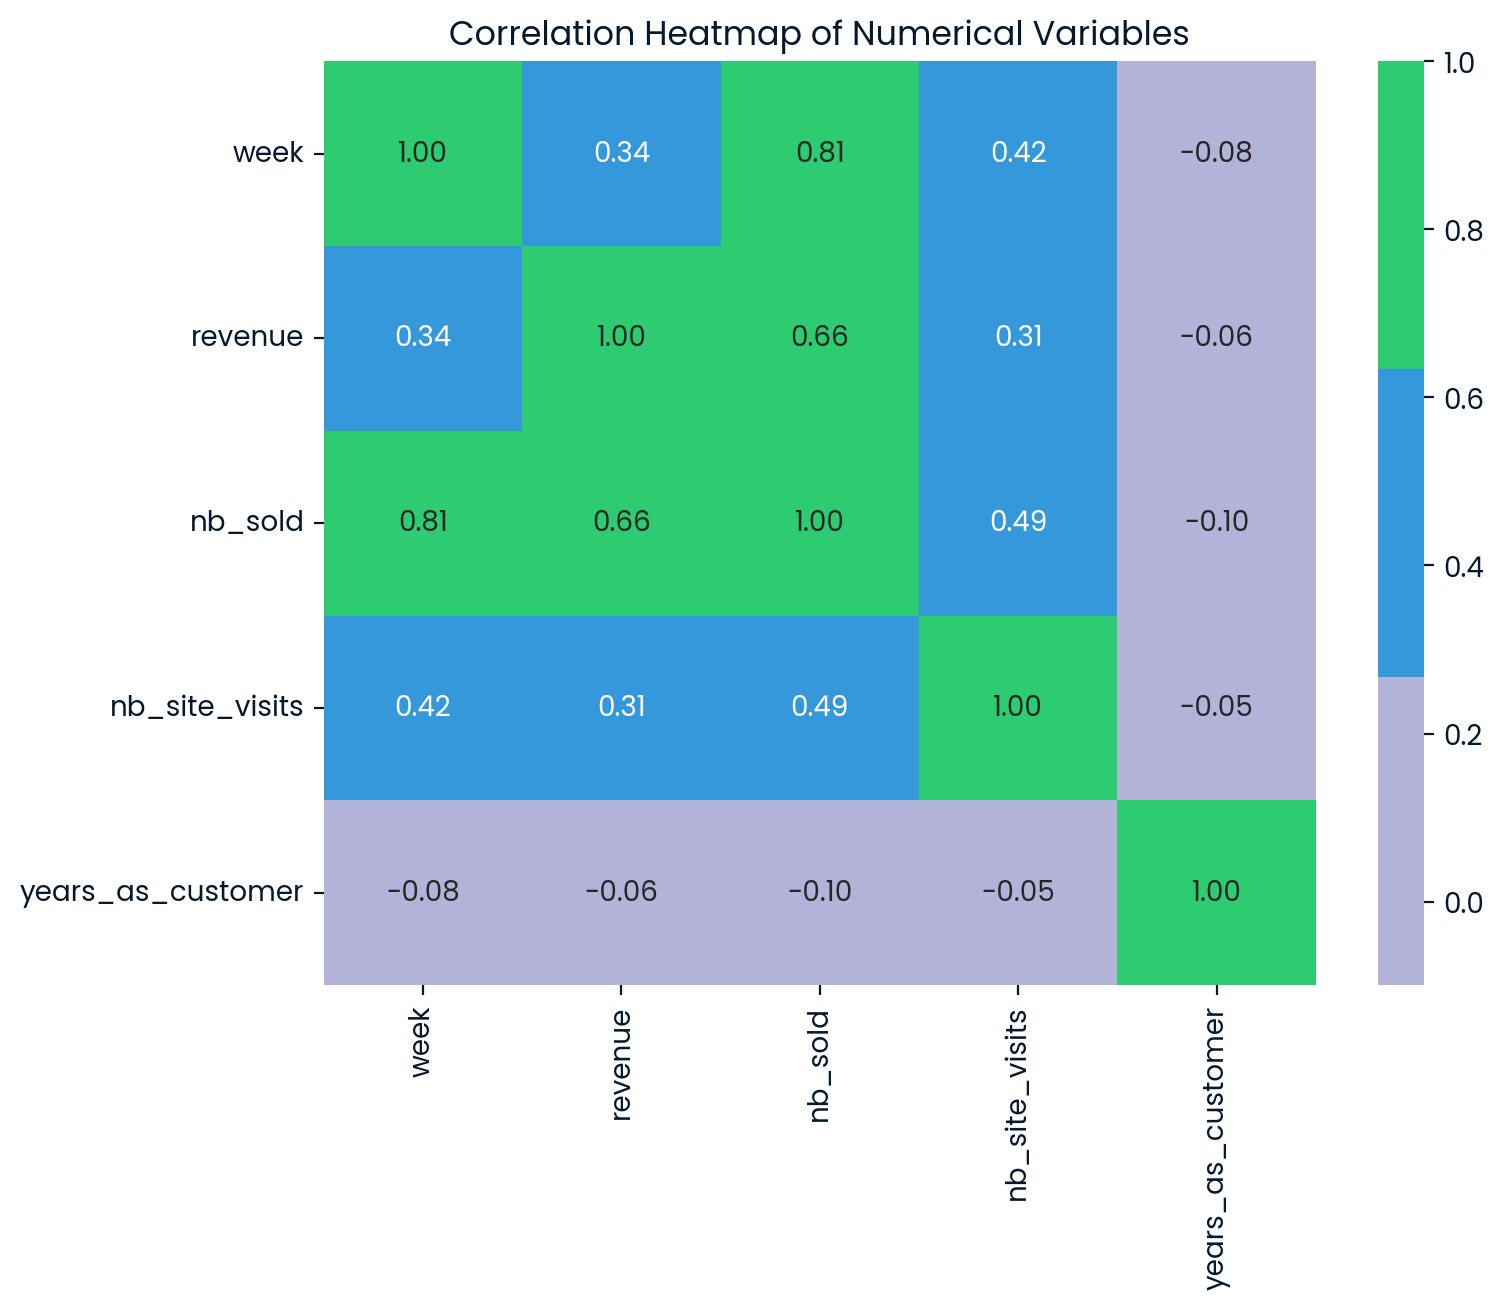

In [20]:
# Select numerical columns for correlation
numeric_vars = ['week','revenue', 'nb_sold', 'nb_site_visits', 'years_as_customer']

# Compute correlation matrix
corr_matrix = new_sales[numeric_vars].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap=['#B3B3D9', '#3498DB', '#2ECC71'], fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

1. Definition of a metric for the business to monitor 
2. How should the business use the metric to monitor the business problem
3. Can you estimate initial value(s) for the metric based on the current data

## Business Metric to be Monitored

### 1. Definition of the Metric: Sales Method Efficiency (SME)

The **Sales Method Efficiency (SME)** metric is a weighted average that measures the effectiveness of each sales channel. Instead of just looking at the number of customers or total revenue, SME combines these factors to reveal which method provides the best return on effort. It is calculated by considering the **average revenue per customer** and the **rate of new customer acquisition** for each method. This will help the business understand not just which method is most popular, but which one is the most profitable and scalable.

---

### 2. How to Use the Metric to Monitor the Business Problem

The organization should use the **SME** metric to monitor and compare the performance of the three sales methods. By tracking SME on a weekly or monthly basis, the business can:

* **Determine ROI:** Identify which method consistently delivers the highest revenue per customer, signaling where resources should be concentrated. The initial analysis showed that while email gets the most customers, the **Email + Call** method has a significantly higher average revenue per customer.
* **Guide Investment Decisions:** Use the data to justify shifting resources. For instance, if the SME for the **Call** method is consistently low, the business might decide to allocate more of its budget to the **Email + Call** method, which has shown strong revenue growth.
* **Forecast and Plan:** Predict future revenue trends based on the historical performance of each sales method. The steady decline in email's effectiveness suggests it may not be a sustainable long-term solution on its own.

---

### 3. Initial Values for the Metric

Based on the initial data, here are the core values that will inform the SME metric for each sales method:

* **Call Method:**
    * **Average Revenue per Customer:** $49.13
    * **Customer Acquisition Trend:** Generally increasing week-over-week before a final decline.

* **Email Method:**
    * **Average Revenue per Customer:** $96.57
    * **Customer Acquisition Trend:** Significantly declining, despite a high initial customer count.

* **Email + Call Method:**
    * **Average Revenue per Customer:** $170.88
    * **Customer Acquisition Trend:** Strong and consistent growth week-over-week.

The initial values clearly indicate that while the **Email** method is a great tool for acquiring a large number of customers, the **Email + Call** method is the most efficient and profitable for the business. This suggests a strategic shift is needed to focus on this high-value, high-growth channel.


## Conclusion and Recommendations


#### Summary of Key Findings

* **Email + Call** is the most efficient sales method. Despite having the lowest customer count, it generates significantly higher average revenue per customer ($170.88) and has shown consistent growth in customer acquisition, unlike the Email-only method, which is in a sharp decline.
* **Customer Loyalty** is a concern. While the company is successfully acquiring a large number of new customers, especially in states like California and Texas, it is struggling to retain and generate value from long-term customers. The data shows a negative correlation between customer tenure and key performance metrics like revenue and site visits.
* **Website Traffic is a Direct Sales Driver**. The analysis shows a strong correlation between website visits and the number of products sold, indicating that customer engagement on the website directly impacts sales volume.

---

#### Recommended Sales Method

The organization should immediately prioritize the **Email + Call** method as its primary sales channel. While the Email-only method has a larger customer base, its declining effectiveness makes it an unsustainable long-term strategy. The **Email + Call** method, on the other hand, is both profitable and scalable, and its consistent growth trend indicates it is a more reliable engine for future revenue.

---

#### Other Recommendations

To address the business challenges identified, we recommend the following actions:

* **Focus on Customer Retention**: Develop and implement targeted campaigns to re-engage long-term customers. These initiatives should aim to increase their website visits and average revenue, which will help reverse the negative trends identified.
* **Optimize Website Experience**: Since website traffic directly impacts sales, invest in a data-driven approach to optimize the user experience. By improving site navigation, product recommendations, and mobile responsiveness, the organization can convert more visits into sales.
* **Allocate Resources Strategically**: Shift resources from underperforming channels to the **Email + Call** method. This includes training sales teams on this combined approach and allocating a greater portion of the marketing budget to support this channel's growth.